In [0]:
from pyspark.sql.functions import col
print("Welcome to the W261 final project!") 

Welcome to the W261 final project!



# Know your mount
Here is the mounting for this class, your source for the original data! Remember, you only have Read access, not Write! Also, become familiar with `dbutils` the equivalent of `gcp` in DataProc

In [0]:
data_BASE_DIR = "dbfs:/mnt/mids-w261/"
display(dbutils.fs.ls(f"{data_BASE_DIR}"))

path name size modificationTime dbfs:/mnt/mids-w261/HW5/ HW5/ 0 0 dbfs:/mnt/mids-w261/OTPW_12M/ OTPW_12M/ 0 0 dbfs:/mnt/mids-w261/OTPW_1D_CSV/ OTPW_1D_CSV/ 0 0 dbfs:/mnt/mids-w261/OTPW_36M/ OTPW_36M/ 0 0 dbfs:/mnt/mids-w261/OTPW_3M/ OTPW_3M/ 0 0 dbfs:/mnt/mids-w261/OTPW_3M_2015.csv OTPW_3M_2015.csv 1500620247 1679772070000 dbfs:/mnt/mids-w261/OTPW_60M/ OTPW_60M/ 0 0 dbfs:/mnt/mids-w261/airport-codes_csv.csv airport-codes_csv.csv 6232459 1677623514000 dbfs:/mnt/mids-w261/datasets_final_project/ datasets_final_project/ 0 0 dbfs:/mnt/mids-w261/datasets_final_project_2022/ datasets_final_project_2022/ 0 0

# Data for the Project

For the project you will have 4 sources of data:

1. Airlines Data: This is the raw data of flights information. You have 3 months, 6 months, 1 year, and full data from 2015 to 2019. Remember the maxima: "Test, Test, Test", so a lot of testing in smaller samples before scaling up! Location of the data? `dbfs:/mnt/mids-w261/datasets_final_project_2022/parquet_airlines_data/`, `dbfs:/mnt/mids-w261/datasets_final_project_2022/parquet_airlines_data_1y/`, etc. (Below the dbutils to get the folders)
2. Weather Data: Raw data for weather information. Same as before, we are sharing 3 months, 6 months, 1 year
3. Stations data: Extra information of the location of the different weather stations. Location `dbfs:/mnt/mids-w261/datasets_final_project_2022/stations_data/stations_with_neighbors.parquet/`
4. OTPW Data: This is our joined data (We joined Airlines and Weather). This is the main dataset for your project, the previous 3 are given for reference. You can attempt your own join for Extra Credit. Location `dbfs:/mnt/mids-w261/OTPW_60M/` and more, several samples are given!

In [0]:
# Stations data      
df_stations = spark.read.parquet(f"dbfs:/mnt/mids-w261/datasets_final_project_2022/stations_data/stations_with_neighbors.parquet/")
display(df_stations)

usaf wban station_id lat lon neighbor_id neighbor_name neighbor_state neighbor_call neighbor_lat neighbor_lon distance_to_neighbor 690020 93218 69002093218 36.0 -121.233 69002093218 JOLON HUNTER LIGGETT MIL RES CA KHGT 36.0 -121.233 0.0 690020 93218 69002093218 36.0 -121.233 69007093217 FRITZSCHE AAF CA KOAR 36.683 -121.767 55.73024537916726 690020 93218 69002093218 36.0 -121.233 69014093101 EL TORO MCAS CA KNZJ 33.667 -117.733 255.49106220353934 690020 93218 69002093218 36.0 -121.233 70027127506 BARROW POINT BARROW AK KPBA 71.333 -156.65 2750.4353299559803 690020 93218 69002093218 36.0 -121.233 70045027512 LONELY AK LNI 70.917 -153.25 2676.3554370627153 690020 93218 69002093218 36.0 -121.233 70063027403 OLIKTOK POW 2 AK POLI 70.5 -149.883 2604.050248854232 690020 93218 69002093218 36.0 -121.233 70063526465 GALBRAITH LAKE AIRPORT AK PAGB 68.479 -149.49 2490.9756094472277 690020 93218 69002093218 36.0 -121.233 70063627405 PRUDHOE BAY AK PAUD 70.25 -148.333 2568.180281844432 690020 93218 69002093218 36.0 -121.233 70104626418 CENTRAL AIRPORT AK PACE 65.567 -144.765 2254.5584891291946 690020 93218 69002093218 36.0 -121.233 70119526625 SHISHMAREF/NEW AIRPORT AK PASH 66.25 -166.089 2743.6881828292408 690020 93218 69002093218 36.0 -121.233 70121326638 POINT LAY LIZ 2 AK PIZ 69.733 -163.017 2796.6187763021226 690020 93218 69002093218 36.0 -121.233 70148626642 KIVALINA AIRPORT AK PAVL 67.732 -164.548 2755.8847615355235 690020 93218 69002093218 36.0 -121.233 70162026508 UMIAT AK PAUM 69.367 -152.133 2580.421414177685 690020 93218 69002093218 36.0 -121.233 70171900490 SHUNGNAK AIRPORT AK PAGH 66.888 -157.162 2560.459862643483 690020 93218 69002093218 36.0 -121.233 70174526480 CHANDALAR LAKE AIRPORT AK PALR 67.511 -148.493 2423.3408124753164 690020 93218 69002093218 36.0 -121.233 70179326524 MANLEY HOT SPRINGS AK PAML 64.999 -150.638 2336.6091618691917 690020 93218 69002093218 36.0 -121.233 70199526628 CAPE DARBY REMOT COM OUTLT AK PAGL 64.55 -163.007 2610.7849480759573 690020 93218 69002093218 36.0 -121.233 70206026632 NORTHEAST CAPE AK KOHC 63.317 -168.967 2740.2899674712785 690020 93218 69002093218 36.0 -121.233 70222326602 KOYUK AIRPORT AK PAKK 64.935 -161.155 2576.6261990332778 690020 93218 69002093218 36.0 -121.233 70231226555 FAREWELL LAKE SEAPLANE BASE AK PAFK 62.543 -153.623 2293.7430034471354 690020 93218 69002093218 36.0 -121.233 70249526547 HAYES RIVER AIRPORT AK PAHZ 61.983 -152.083 2230.946084519868 690020 93218 69002093218 36.0 -121.233 70255026514 SKWENTNA AIRPORT AK PASW 61.977 -151.217 2209.0623964277706 690020 93218 69002093218 36.0 -121.233 70264026414 SUMMIT AK PAST 63.331 -149.127 2223.352307308065 690020 93218 69002093218 36.0 -121.233 70264726499 HEALY RIVER AIRPORT AK PAHV 63.866 -148.969 2246.1213363715397 690020 93218 69002093218 36.0 -121.233 70264846406 CANTWELL AIRPORT AK PATW 63.391 -148.956 2222.52653340686 690020 93218 69002093218 36.0 -121.233 70267526484 PAXSON AIRPORT AK PAXK 63.032 -145.498 2131.3748228756726 690020 93218 69002093218 36.0 -121.233 70269596402 JONESVILLE MINE AIRPORT AK PAJV 61.714 -148.909 2140.8509123873396 690020 93218 69002093218 36.0 -121.233 70271126439 SHEEP MOUNTAIN AIRPORT AK PASP 61.812 -147.507 2112.749500893187 690020 93218 69002093218 36.0 -121.233 70274526560 WILLOW AIRPORT AK PAUO 61.748 -150.054 2170.093644623675 690020 93218 69002093218 36.0 -121.233 70275026442 NATIONAL WEATHER SERVICE OFFI AK PAVW 61.13 -146.352 2052.4465612834106 690020 93218 69002093218 36.0 -121.233 70275546404 MCCARTHY AIRPORT AK PAMX 61.437 -142.904 1993.3299561949077 690020 93218 69002093218 36.0 -121.233 70275726444 WHITTIER AIRPORT AK PAWR 60.783 -148.733 2092.9535147837305 690020 93218 69002093218 36.0 -121.233 70291346402 DEVILS MOUNTAIN LODGE AIRPORT AK PABN 62.402 -142.995 2047.8132237563839 690020 93218 69002093218 36.0 -121.233 70291526486 DUFFY'S TAVERN AIRPORT AK PADT 62.709 -143.981 2083.812325469856 690020 93218 69002093218 36.0 -121.233 70292326440 TANACROSS AK TSG 63.383 -143.333 2

In [0]:
df_stations.printSchema()

root
 |-- usaf: string (nullable = true)
 |-- wban: string (nullable = true)
 |-- station_id: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- lon: double (nullable = true)
 |-- neighbor_id: string (nullable = true)
 |-- neighbor_name: string (nullable = true)
 |-- neighbor_state: string (nullable = true)
 |-- neighbor_call: string (nullable = true)
 |-- neighbor_lat: double (nullable = true)
 |-- neighbor_lon: double (nullable = true)
 |-- distance_to_neighbor: double (nullable = true)



In [0]:
df_stations.groupBy(df_stations.columns) \
            .count() \
            .where(col('count') > 1) \
            .select(F.sum('count')).show()
#No duplicates

+----------+
|sum(count)|
+----------+
|      NULL|
+----------+



In [0]:
import pyspark.sql.functions as F

display(df_stations.filter(df_stations['station_id'] == '69002093218'))

#how many stations are there? 
#2237 including itself
stations_count = df_stations.select('station_id').distinct().count()
print("Number of distinct stations:", stations_count)

#how many neighbors for a station? 
#2237 neighbors including itself
#All stations are fully connected. It's a weighted, directional, and fully connected graph.
neighbors_count = df_stations.groupBy('station_id').agg(F.count('neighbor_id').alias('number_of_neighbors'))
display(neighbors_count)

#Number of stations by state. 
#AK has 173 airports due to the small population combined with the large area of the state. there are many towns with no roads leading to them, which are only accessible by airplane (wiki)
#CA has 145. If the weather in CA is bad then there are high probability that the flight from CA could  be delayed.
stations_count_state = df_stations.filter(df_stations['station_id'] == df_stations['neighbor_id']).groupBy('neighbor_state').agg(F.count('station_id').alias('stations_count_state'))
display(stations_count_state)

#Average distance between two airports. Long distance can lead to potential flight delay.
#Airports in Alaska and Hawaii are most distanced on average.
#which also have higher probability of being affected by weather in the middle way of flight to the destination.
stations_avg_distance = df_stations.groupBy(['neighbor_id', 'neighbor_name']).agg(
    F.avg('distance_to_neighbor').alias('avg_distance_to_neighbor'),
    F.stddev('distance_to_neighbor').alias('stddev_distance_to_neighbor'),
    F.max('distance_to_neighbor').alias('max_distance_to_neighbor')
).orderBy('avg_distance_to_neighbor')
display(stations_avg_distance)

usaf wban station_id lat lon neighbor_id neighbor_name neighbor_state neighbor_call neighbor_lat neighbor_lon distance_to_neighbor 690020 93218 69002093218 36.0 -121.233 69002093218 JOLON HUNTER LIGGETT MIL RES CA KHGT 36.0 -121.233 0.0 690020 93218 69002093218 36.0 -121.233 69007093217 FRITZSCHE AAF CA KOAR 36.683 -121.767 55.73024537916726 690020 93218 69002093218 36.0 -121.233 69014093101 EL TORO MCAS CA KNZJ 33.667 -117.733 255.49106220353934 690020 93218 69002093218 36.0 -121.233 70027127506 BARROW POINT BARROW AK KPBA 71.333 -156.65 2750.4353299559803 690020 93218 69002093218 36.0 -121.233 70045027512 LONELY AK LNI 70.917 -153.25 2676.3554370627153 690020 93218 69002093218 36.0 -121.233 70063027403 OLIKTOK POW 2 AK POLI 70.5 -149.883 2604.050248854232 690020 93218 69002093218 36.0 -121.233 70063526465 GALBRAITH LAKE AIRPORT AK PAGB 68.479 -149.49 2490.9756094472277 690020 93218 69002093218 36.0 -121.233 70063627405 PRUDHOE BAY AK PAUD 70.25 -148.333 2568.180281844432 690020 93218 69002093218 36.0 -121.233 70104626418 CENTRAL AIRPORT AK PACE 65.567 -144.765 2254.5584891291946 690020 93218 69002093218 36.0 -121.233 70119526625 SHISHMAREF/NEW AIRPORT AK PASH 66.25 -166.089 2743.6881828292408 690020 93218 69002093218 36.0 -121.233 70121326638 POINT LAY LIZ 2 AK PIZ 69.733 -163.017 2796.6187763021226 690020 93218 69002093218 36.0 -121.233 70148626642 KIVALINA AIRPORT AK PAVL 67.732 -164.548 2755.8847615355235 690020 93218 69002093218 36.0 -121.233 70162026508 UMIAT AK PAUM 69.367 -152.133 2580.421414177685 690020 93218 69002093218 36.0 -121.233 70171900490 SHUNGNAK AIRPORT AK PAGH 66.888 -157.162 2560.459862643483 690020 93218 69002093218 36.0 -121.233 70174526480 CHANDALAR LAKE AIRPORT AK PALR 67.511 -148.493 2423.3408124753164 690020 93218 69002093218 36.0 -121.233 70179326524 MANLEY HOT SPRINGS AK PAML 64.999 -150.638 2336.6091618691917 690020 93218 69002093218 36.0 -121.233 70199526628 CAPE DARBY REMOT COM OUTLT AK PAGL 64.55 -163.007 2610.7849480759573 690020 93218 69002093218 36.0 -121.233 70206026632 NORTHEAST CAPE AK KOHC 63.317 -168.967 2740.2899674712785 690020 93218 69002093218 36.0 -121.233 70222326602 KOYUK AIRPORT AK PAKK 64.935 -161.155 2576.6261990332778 690020 93218 69002093218 36.0 -121.233 70231226555 FAREWELL LAKE SEAPLANE BASE AK PAFK 62.543 -153.623 2293.7430034471354 690020 93218 69002093218 36.0 -121.233 70249526547 HAYES RIVER AIRPORT AK PAHZ 61.983 -152.083 2230.946084519868 690020 93218 69002093218 36.0 -121.233 70255026514 SKWENTNA AIRPORT AK PASW 61.977 -151.217 2209.0623964277706 690020 93218 69002093218 36.0 -121.233 70264026414 SUMMIT AK PAST 63.331 -149.127 2223.352307308065 690020 93218 69002093218 36.0 -121.233 70264726499 HEALY RIVER AIRPORT AK PAHV 63.866 -148.969 2246.1213363715397 690020 93218 69002093218 36.0 -121.233 70264846406 CANTWELL AIRPORT AK PATW 63.391 -148.956 2222.52653340686 690020 93218 69002093218 36.0 -121.233 70267526484 PAXSON AIRPORT AK PAXK 63.032 -145.498 2131.3748228756726 690020 93218 69002093218 36.0 -121.233 70269596402 JONESVILLE MINE AIRPORT AK PAJV 61.714 -148.909 2140.8509123873396 690020 93218 69002093218 36.0 -121.233 70271126439 SHEEP MOUNTAIN AIRPORT AK PASP 61.812 -147.507 2112.749500893187 690020 93218 69002093218 36.0 -121.233 70274526560 WILLOW AIRPORT AK PAUO 61.748 -150.054 2170.093644623675 690020 93218 69002093218 36.0 -121.233 70275026442 NATIONAL WEATHER SERVICE OFFI AK PAVW 61.13 -146.352 2052.4465612834106 690020 93218 69002093218 36.0 -121.233 70275546404 MCCARTHY AIRPORT AK PAMX 61.437 -142.904 1993.3299561949077 690020 93218 69002093218 36.0 -121.233 70275726444 WHITTIER AIRPORT AK PAWR 60.783 -148.733 2092.9535147837305 690020 93218 69002093218 36.0 -121.233 70291346402 DEVILS MOUNTAIN LODGE AIRPORT AK PABN 62.402 -142.995 2047.8132237563839 690020 93218 69002093218 36.0 -121.233 70291526486 DUFFY'S TAVERN AIRPORT AK PADT 62.709 -143.981 2083.812325469856 690020 93218 69002093218 36.0 -121.233 70292326440 TANACROSS AK TSG 63.383 -143.333 2

Number of distinct stations: 2237


station_id number_of_neighbors 70275546404 2237 72224503882 2237 72226613850 2237 70104526649 2237 72074924255 2237 72213653883 2237 72455013947 2237 72637594817 2237 72090400299 2237 72744904954 2237 70231026510 2237 70362025335 2237 72035753993 2237 72063300219 2237 72221013858 2237 72392623136 2237 72465023065 2237 72548604906 2237 72677794055 2237 74614023112 2237 72051724165 2237 72220103723 2237 72420014891 2237 70273026451 2237 72217853953 2237 72253512909 2237 72374703101 2237 72502300474 2237 72314453890 2237 72405853818 2237 72476793069 2237 72043700143 2237 72072900435 2237 72211454901 2237 72281023199 2237 72438453842 2237 72639600422 2237 74781013857 2237 72059700190 2237 72400703719 2237 70171900490 2237 70219026615 2237 72090200298 2237 72090300441 2237 72257793984 2237 72531603887 2237 72210312895 2237 72399014711 2237 72409754738 2237 72071900254 2237 70019726558 2237 72211612873 2237 72458593997 2237 72598524267 2237 72654594950 2237 72657594960 2237 72784624160 2237 72314863859 2237 70179326524 2237 70489625625 2237 72032604981 2237 72269593041 2237 72317493783 2237 72375493027 2237 72450503923 2237 72563624017 2237 72594624286 2237 72509854704 2237 72541554821 2237 72072600259 2237 72438912991 2237 70200626502 2237 70259026523 2237 70259526559 2237 72031503045 2237 72340693991 2237 72467494050 2237 72589594236 2237 72656604965 2237 72403793728 2237 72217653884 2237 72253312962 2237 72429613841 2237 72445703938 2237 72532014842 2237 72562624091 2237 72572424174 2237 74917900392 2237 A0002804116 2237 A0677300334 2237 72049354758 2237 70271126439 2237 72059800191 2237 72062400211 2237 72343653922 2237 72438093819 2237 72548514940 2237 72584793230 2237 72638094814 2237 72642604895 2237 74516023202 2237 74740013973 2237 72363023047 2237 72505004781 2237 72216226554 2237 72586124142 2237 70133026616 2237 72216453949 2237 72236192808 2237 72288623130 2237 72290303131 2237 72341993992 2237 72447593909 2237 A0735900240 2237 72032464753 2237 72401703707 2237 72622794790 2237 74000154793 2237 70388025315 2237 74003024103 2237 72045500145 2237 72027103044 2237 72059400188 2237 72310013883 2237 72344853934 2237 72525300380 2237 72041500140 2237 72262023055 2237 72306613713 2237 72451623020 2237 72517564706 2237 72636404883 2237 72747404923 2237 70489725515 2237 72509714790 2237 72464603028 2237 69015093121 2237 70235026534 2237 70326025503 2237 70367025322 2237 72061500206 2237 72092500312 2237 72097100342 2237 72328493839 2237 72747694961 2237 72212853899 2237 72308513750 2237 72404303756 2237 72541404886 2237 74486454787 2237 70291346402 2237 72456713921 2237 72030804992 2237 72287493134 2237 72312314886 2237 72427514894 2237 72646594890 2237 72435653866 2237 72520754735 2237 72616094700 2237 72638414817 2237 72036663879 2237 70305800110 2237 72033900121 2237 72092400311 2237 72251512926 2237 72276403029 2237 72278903192 2237 72310453867 2237 72381523161 2237 72551594947 2237 72552594949 2237 72597694285 2237 72643514991 2237 72656904933 2237 72746604918 2237 74505753130 2237 72269200367 2237 74598013702 2237 A0001163848 2237 70249026526 2237 72031853965 2237 72057600174 2237 72272803196 2237 72285700368 2237 72345013971 2237 72354403954 2237 72429793812 2237 72520404813 2237 72525404851 2237 72546604938 2237 72510514770 2237 72607314615 2237 72213353946 2237 72091100301 2237 72211912883 2237 72437303868 2237 72482893241 2237 72537804887 2237 72583024128 2237 72639200424 2237 72768494051 2237 74780563818 2237 72053900165 2237 72209003875 2237 72409514792 2237 72103600353 2237 72205112841 2237 70251026528 2237 70272026401 2237 72036163870 2237 72046700148 2237 72062900216 2237 72085900286 2237 72092300310 2237 72225353992 2237 72233154941 2237 72255012912 2237 72311013873 2237 72436553896 2237 72445493996 2237 74671693808 2237 72512854739 2237 72656394969 2237 72773524139 2237 72026723224 2237 72026853882 2237 72250612959 2237 72253712961 2237 72477693075 2237 72574424027 2237 72639094849 2237 74251353937 2237 74780703

neighbor_state stations_count_state AZ 39 SC 45 LA 56 MN 96 NJ 19 OR 32 VA 56 RI 6 WY 30 KY 23 NH 13 MI 75 NV 21 WI 61 ID 28 CA 145 NE 39 CT 10 MT 25 NC 71 VT 11 MD 20 DE 3 MO 34 VI 2 IL 61 ME 20 WA 43 ND 31 MS 30 AL 38 IN 31 OH 40 TN 18 NM 33 IA 60 PA 39 SD 22 NY 39 TX 188 WV 16 GA 62 MA 25 KS 36 FL 85 CO 59 AK 173 AR 34 OK 55 PR 4 UT 21 HI 14

neighbor_id neighbor_name avg_distance_to_neighbor stddev min max 72446453916 AGRICULTURAL SCIENCE CENTER 937.4120059925416 723.4532328281612 0.0 4185.0219381154875 72445514938 KIRKSVILLE REGIONAL ARPT 938.1378817093266 733.944357648346 0.0 4209.389463005165 72086900295 JESSE VIERTEL MEMORIAL AIRPOR 938.8995895007262 746.2243994461799 0.0 4261.785166503963 72104500354 MIDWEST NATIONAL AIR CENTER A 938.9102677159071 720.05888139546 0.0 4182.36543460741 72445303994 SEDALIA MEMORIAL AIRPORT 939.550187422034 742.5333645280753 0.0 4255.4918199312115 72236700363 SKYHAVEN AIRPORT 939.5670922339551 733.4477877174984 0.0 4228.643340349047 72446713930 WHITEMAN AFB AIRPORT 939.6010023796134 737.5317912024019 0.0 4241.228914337562 72227454939 CENTERVILLE MUNICIPAL AIRPORT 939.6353100975778 721.9408561212817 0.0 4167.140304109593 72549994991 LAMONI MUNICIPAL AIRPORT 939.8025783384629 709.3871781708934 0.0 4133.198490487868 72030653879 LEE'S SUMMIT MUNICIPAL APT 940.027653255945 723.9071689139647 0.0 4198.579353105313 72446313988 C.R. WHEELER DOWNTOWN ARPT 940.2049963759725 719.0337844986739 0.0 4182.164112143267 72445003945 COLUMBIA REGIONAL AIRPORT 940.2572709065448 754.1779208048235 0.0 4285.452304000068 72446003947 KANSAS CITY INTERNATIONAL AIR 940.269847697808 715.1402636682195 0.0 4168.449001102276 72449013993 ROSECRANS MEMORIAL AIRPORT 940.6718269697425 706.7729692440255 0.0 4137.734692940213 72456713921 SHERMAN AAF 940.8730522156195 711.9103059139884 0.0 4158.058325603565 72047600455 HANNIBAL REGIONAL AIRPORT 940.9202234750502 753.728548665192 0.0 4268.086325558579 72446603929 RICHARD GEBAUR 941.0243253335484 722.9398892282471 0.0 4197.30295663588 72546904913 CHARITON MUNICIPAL AIRPORT 941.358251528263 711.7692382356092 0.0 4133.8812313397175 72445803963 JEFFERSON CITY MEMO ARPT 941.4875045809114 757.8224842630606 0.0 4299.125228310815 72446803967 JOHNSON CO EXECUTIVE ARPT 941.612522508775 720.5959959388814 0.0 4190.322923006983 72063600222 CLINTON MEMORIAL AIRPORT 941.7565796606053 740.3351892780606 0.0 4254.65795383709 72070154942 OSCEOLA MUNICIPAL AIRPORT 941.7934436697861 707.0321149804987 0.0 4120.21635802766 72443093989 QUINCY RGNL-BLDWN FLD ARPT 942.1841160153693 754.6453496803537 0.0 4266.577863518995 72447593909 NEW CENTURY AIRCENTER ARPT 942.2692694983426 718.906662741227 0.0 4185.574630172758 72545604921 KEOKUK MUNICIPAL AIRPORT 942.3990445160097 744.8236642641242 0.0 4231.783143413574 72546514950 OTTUMWA INDUSTRIAL AIRPORT 942.6977871756726 722.8018219415258 0.0 4162.616822641636 72547404915 CRESTON MUNICIPAL AIRPORT 942.7694716787303 698.8517997121935 0.0 4097.763137286238 72450803997 LAWRENCE MUNICIPAL AIRPORT 943.0512646997333 712.6651464740592 0.0 4164.809389980879 72549304962 KNOXVILLE MUNICIPAL ARPT 943.3389331056804 711.5483610553903 0.0 4128.985658008283 72035154919 OSKALOOSA MUNICIPAL AIRPORT 943.4662095026334 720.7334336185392 0.0 4155.1781562749875 72547904937 SCHENCK FIELD AIRPORT 943.4850257584002 693.9220145352946 0.0 4087.3384386414705 72649804925 FAIRFIELD MUNICIPAL ARPT 943.4857424598029 729.8094770233371 0.0 4182.27589774024 72548304930 FORT MADISON MUNICIPAL APT 943.6870331716683 743.7334250779124 0.0 4225.471801757078 72445953931 LEE C FINE MEMORIAL ARPT 943.8672902014669 758.5123997944488 0.0 4309.426883188614 74466353950 PITTSFIELD-PENSTON MUNI AP 944.2316498892751 764.2269818279497 0.0 4296.609860196381 72553394957 BRENNER FIELD AIRPORT 944.2416601045483 694.6565055922972 0.0 4097.821734896925 72031204964 PELLA MUNICIPAL AIRPORT 944.2488603039475 712.5038082345208 0.0 4130.099931731607 72030904947 MOUNT PLEASANT MUNI ARPT 944.4747329514327 737.5474455269564 0.0 4204.444893145131 72094900329 CAMDENTON MEMORIAL AIRPORT 944.6311852114895 758.1548396995908 0.0 4310.464879985307 72456013996 PHILIP BILLARD MUNICIPAL AIRP 945.0567116703266 706.7012545107606 0.0 4146.09620113057 72542014931 SE IOWA REGIONAL AIRPORT 945.2908911817177 744.9610264629478 0.0 4226.548131208352 72546704973 SHENANDOAH MUNICIPAL A

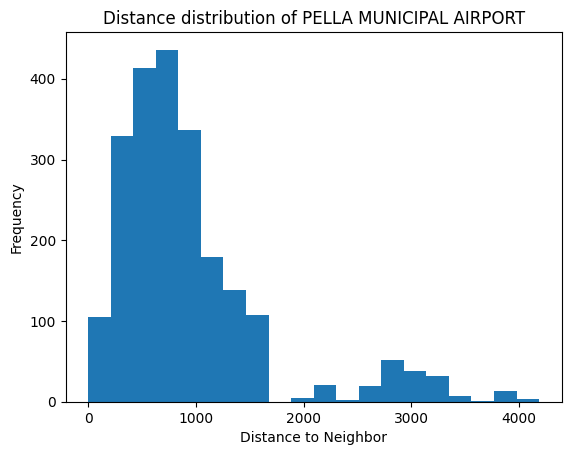

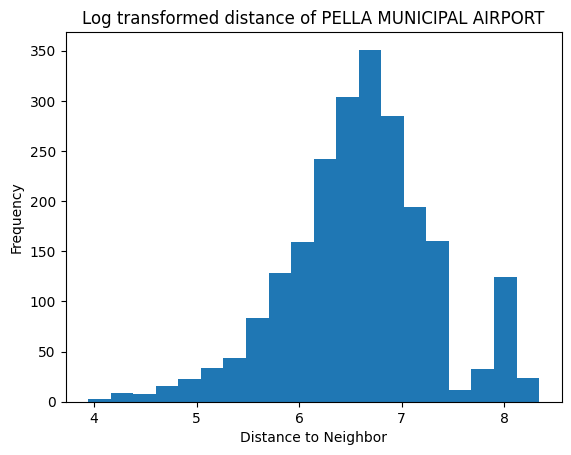

In [0]:
#detail distance of specific airports
import matplotlib.pyplot as plt
import numpy as np

#Pick the airport that has a smallest average distance to other airports (The center of geography)
#PELLA MUNICIPAL AIRPORT
specific_airport_df = df_stations.filter(df_stations['station_id'] == '72446453916')

# Select the 'distance_to_neighbor' column and transfer it to rdd.
distance_data = specific_airport_df.select('distance_to_neighbor').rdd.flatMap(lambda x: x).collect()

plt.hist(distance_data, bins=20) 
plt.title('Distance distribution of PELLA MUNICIPAL AIRPORT')
plt.xlabel('Distance to Neighbor')
plt.ylabel('Frequency')
plt.show()

#It's a little bit right skewed and may need a log transformation
filtered_distance_data = [d for d in distance_data if d > 0]
distance_log_data = np.log(filtered_distance_data)

plt.hist(distance_log_data, bins=20) 
plt.title('Log transformed distance of PELLA MUNICIPAL AIRPORT')
plt.xlabel('Distance to Neighbor')
plt.ylabel('Frequency')
plt.show()


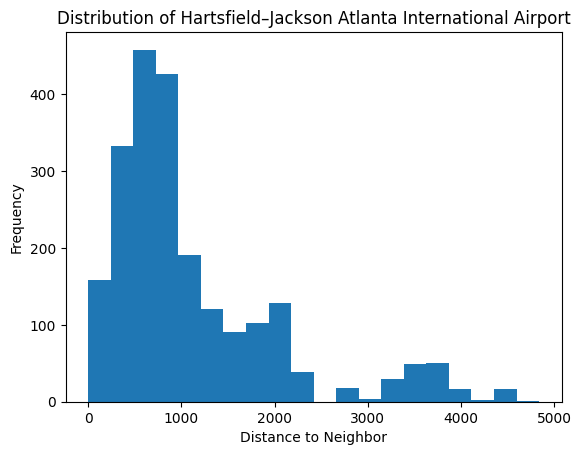

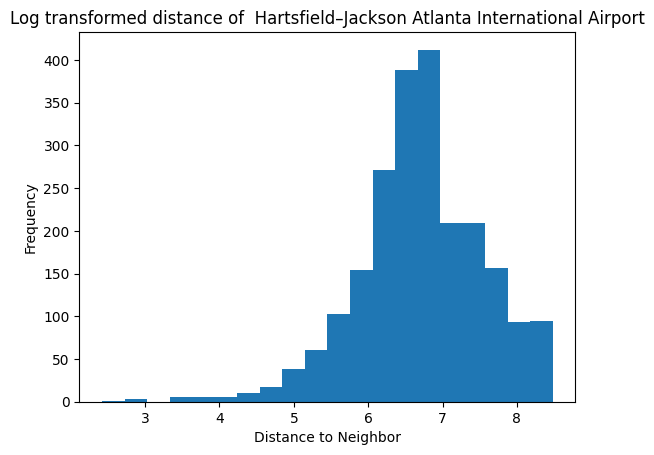

In [0]:
# The busiest airport of US: Hartsfield–Jackson Atlanta International Airport (ICAO code: KATL), id = 72219013874

#Pick the busiest airport of US (The center of geography in terms of betweeness)
specific_airport_df = df_stations.filter(df_stations['station_id'] == '72219013874')

# Select the 'distance_to_neighbor' column and transfer it to rdd.
distance_data = specific_airport_df.select('distance_to_neighbor').rdd.flatMap(lambda x: x).collect()

plt.hist(distance_data, bins=20) 
plt.title('Distribution of Hartsfield–Jackson Atlanta International Airport')
plt.xlabel('Distance to Neighbor')
plt.ylabel('Frequency')
plt.show()

#It's a little bit right skewed and may need a log transformation
filtered_distance_data = [d for d in distance_data if d > 0]
distance_log_data = np.log(filtered_distance_data)

plt.hist(distance_log_data, bins=20) 
plt.title('Log transformed distance of  Hartsfield–Jackson Atlanta International Airport')
plt.xlabel('Distance to Neighbor')
plt.ylabel('Frequency')
plt.show()

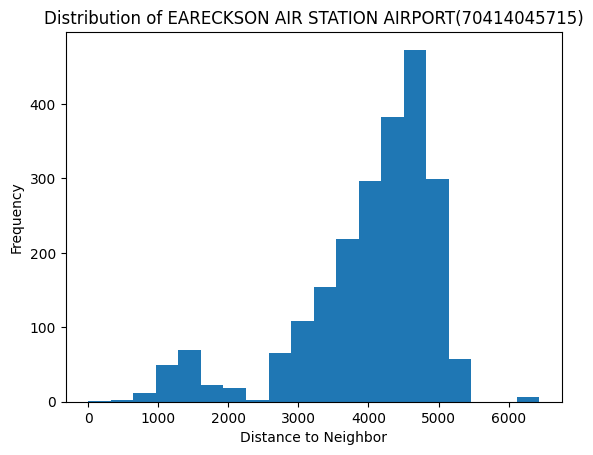

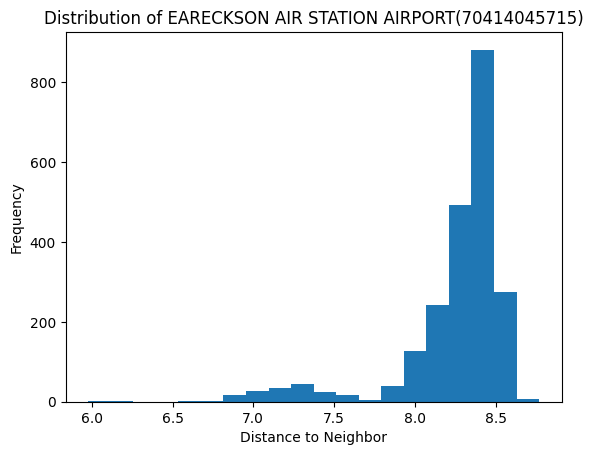

In [0]:
#Pick the most distanced airport
#EARECKSON AIR STATION AIRPORT
specific_airport_df = df_stations.filter(df_stations['station_id'] == '70414045715')

# Select the 'distance_to_neighbor' column and transfer it to rdd.
distance_data = specific_airport_df.select('distance_to_neighbor').rdd.flatMap(lambda x: x).collect()

plt.hist(distance_data, bins=20) 
plt.title('Distribution of EARECKSON AIR STATION AIRPORT(70414045715)')
plt.xlabel('Distance to Neighbor')
plt.ylabel('Frequency')
plt.show()

#It's a little bit right skewed and may need a log transformation
filtered_distance_data = [d for d in distance_data if d > 0]
distance_log_data = np.log(filtered_distance_data)

plt.hist(distance_log_data, bins=20) 
plt.title('Distribution of EARECKSON AIR STATION AIRPORT(70414045715)')
plt.xlabel('Distance to Neighbor')
plt.ylabel('Frequency')
plt.show()

#It may not need to take the log transformation

# Pipeline Steps For Classification Problem

These are the "normal" steps for a Classification Pipeline! Of course, you can try more!

## 1. Data cleaning and preprocessing

* Remove outliers or missing values
* Encode categorical features
* Scale numerical features

## 2. Feature selection

* Select the most important features for the model
* Use univariate feature selection, recursive feature elimination, or random forest feature importance